In [1]:
import sys
import os

#Ensure Python can find the Code directory
sys.path.append(os.path.abspath(".."))

import utils

In [2]:
#Use functions and packages
df = utils.load_data()
df.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
1,2.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
2,3.0,michael ryan,michael,ryan,Male,06/02/1985,31,25 - 45,Caucasian,0,...,NaN,Risk of Recidivism,5,Medium,31/12/2014,Risk of Violence,2,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0


In [3]:
#Drop duplicate rows based on the 'name' column
df_non_dup = df.drop_duplicates(subset='name')
#Drop rows where is_resid is -1 (cases where the researcher was not able to find an associated COMPAS case)
df_non_dup = df_non_dup[df_non_dup['is_recid'] != -1]
df_non_dup = df_non_dup[df_non_dup['decile_score'] != -1]

In [4]:
df_non_dup.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,vr_charge_desc,type_of_assessment,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,NaN,Risk of Recidivism,1,Low,14/08/2013,Risk of Violence,1,Low,0,0
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,Felony Battery (Dom Strang),Risk of Recidivism,3,Low,27/01/2013,Risk of Violence,1,Low,0,1
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,NaN,Risk of Recidivism,4,Low,14/04/2013,Risk of Violence,3,Low,4,0
9,10.0,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,...,NaN,Risk of Recidivism,8,High,13/01/2013,Risk of Violence,6,Medium,1,0
10,11.0,bouthy pierrelouis,bouthy,pierrelouis,Male,22/01/1973,43,25 - 45,Other,0,...,NaN,Risk of Recidivism,1,Low,26/03/2013,Risk of Violence,1,Low,2,0


In [5]:
#Create a column that indicates whether the COMPAS prediction was correct for general recidivism
df_non_dup['resid_outcome'] = ''
df_non_dup['resid_outcome'] = utils.np.where(
    (df_non_dup['is_recid'] == 1) & (df_non_dup['decile_score'] >= 5), 'Positive',
    utils.np.where(
        (df_non_dup['is_recid'] == 0) & (df_non_dup['decile_score'] < 5), 'Negative',
        utils.np.where(
            (df_non_dup['is_recid'] == 1) & (df_non_dup['decile_score'] < 5), 'False Positive',
            utils.np.where(
                (df_non_dup['is_recid'] == 0) & (df_non_dup['decile_score'] >= 5), 'False Negative',
                ''
            )
        )
    )
)

In [6]:
#Create a column that indicates whether the COMPAS prediction was correct for violent recidivism
df_non_dup['v_resid_outcome'] = ''
df_non_dup['v_resid_outcome'] = utils.np.where(
    (df_non_dup['is_violent_recid'] == 1) & (df_non_dup['v_decile_score'] >= 5), 'Positive',
    utils.np.where(
        (df_non_dup['is_violent_recid'] == 0) & (df_non_dup['v_decile_score'] < 5), 'Negative',
        utils.np.where(
            (df_non_dup['is_violent_recid'] == 1) & (df_non_dup['v_decile_score'] < 5), 'False Positive',
            utils.np.where(
                (df_non_dup['is_violent_recid'] == 0) & (df_non_dup['v_decile_score'] >= 5), 'False Negative',
                ''
            )
        )
    )
)


In [7]:
df_non_dup.head()

,id,name,first,last,sex,dob,age,age_cat,race,juv_fel_count,...,decile_score.1,score_text,screening_date,v_type_of_assessment,v_decile_score,v_score_text,priors_count.1,event,resid_outcome,v_resid_outcome
0,1.0,miguel hernandez,miguel,hernandez,Male,18/04/1947,69,Greater than 45,Other,0,...,1,Low,14/08/2013,Risk of Violence,1,Low,0,0,Negative,Negative
3,4.0,kevon dixon,kevon,dixon,Male,22/01/1982,34,25 - 45,African-American,0,...,3,Low,27/01/2013,Risk of Violence,1,Low,0,1,False Positive,False Positive
4,5.0,ed philo,ed,philo,Male,14/05/1991,24,Less than 25,African-American,0,...,4,Low,14/04/2013,Risk of Violence,3,Low,4,0,False Positive,Negative
9,10.0,marcu brown,marcu,brown,Male,21/01/1993,23,Less than 25,African-American,0,...,8,High,13/01/2013,Risk of Violence,6,Medium,1,0,False Negative,False Negative
10,11.0,bouthy pierrelouis,bouthy,pierrelouis,Male,22/01/1973,43,25 - 45,Other,0,...,1,Low,26/03/2013,Risk of Violence,1,Low,2,0,Negative,Negative


### Identify optimal number of bins for histogram

In [8]:
#Use Rice Rule to determine number of bins
rice_bins = utils.np.ceil(2 *utils.np.cbrt(len(df_non_dup)))

In [9]:
#Use Freedman-Diaconis Rule to determine number of bins
bin_width = 2*((utils.np.percentile(df_non_dup['age'], 75) - utils.np.percentile(df_non_dup['age'], 25))/ utils.np.cbrt(len(df_non_dup)))
fd_bins = int(utils.np.ceil((max(df_non_dup['age']) - min(df_non_dup['age']))/bin_width))

In [10]:
#Use Sturges' Rule to determine an appropriate number of bins
sturges_bin = utils.np.ceil(utils.np.log2(len(df_non_dup['age'])) + 1)

In [11]:
int(df_non_dup['age'].min())


18

In [12]:
#Manually set bin sizes
age_min = int(df_non_dup['age'].min())
age_max = int(df_non_dup['age'].max())
bins = bins_3_year = list(range(age_min, age_max + 4, 3))


In [13]:
len(bins_3_year)

28

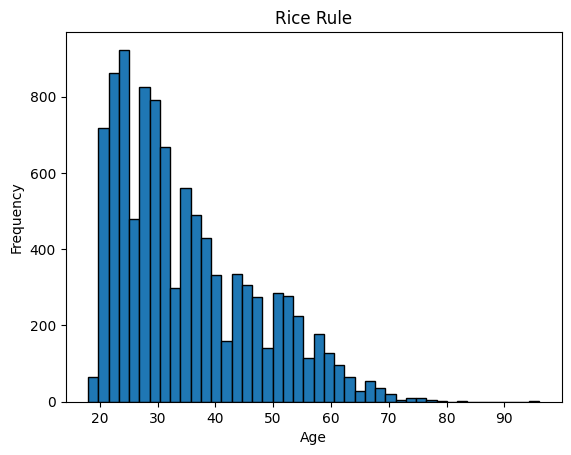

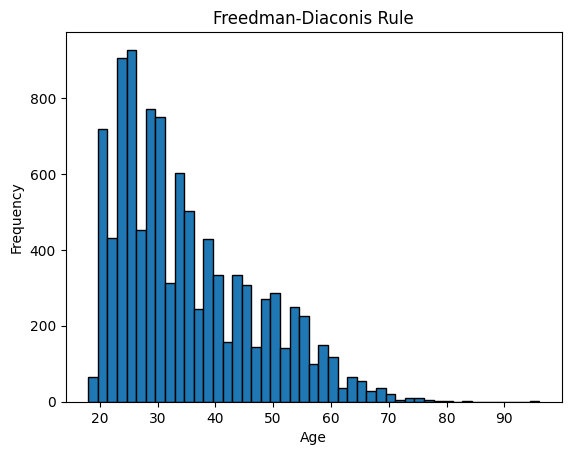

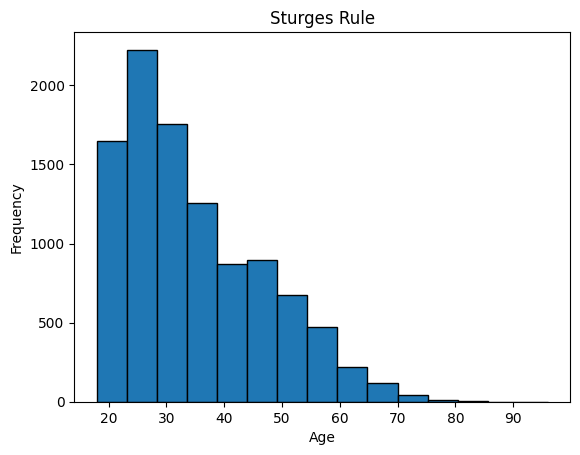

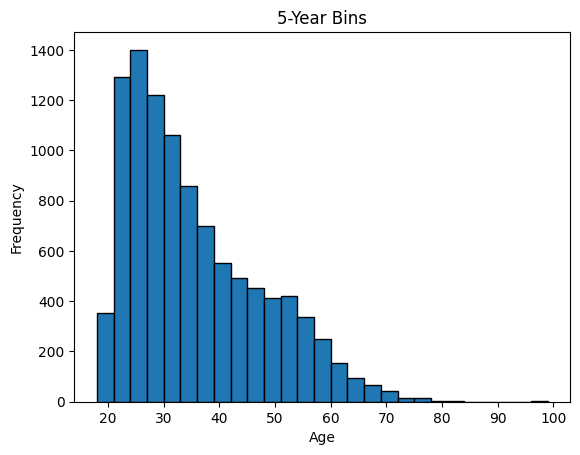

In [14]:
#Create a list of titles
titles = ['Rice Rule', 'Freedman-Diaconis Rule', 'Sturges Rule', '5-Year Bins']
#Plot the histograms for the different bin sizes
for i, bins in enumerate([int(rice_bins), int(fd_bins), int(sturges_bin), bins_3_year]):
    utils.plt.hist(df_non_dup['age'], bins=bins, edgecolor='black')
    utils.plt.title(titles[i])
    utils.plt.xlabel('Age')
    utils.plt.ylabel('Frequency')
    utils.plt.show()

## Age Distribution

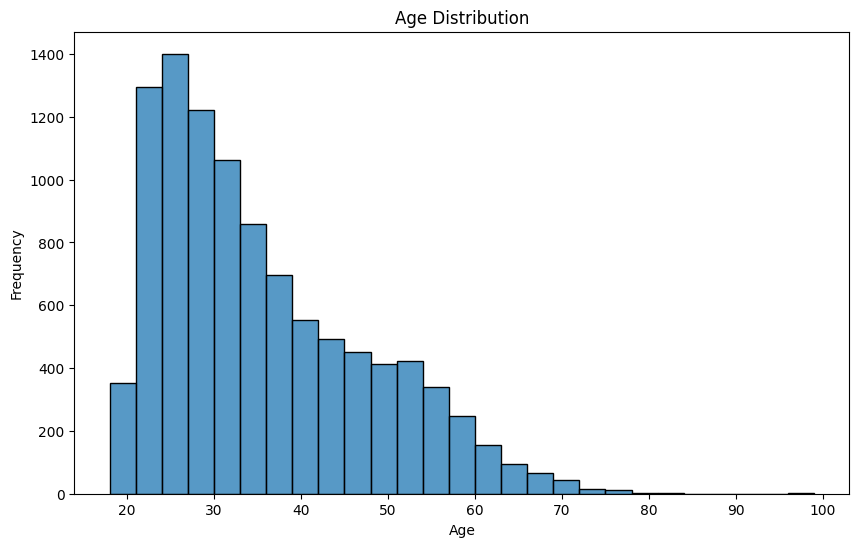

In [70]:
#Visualize the age distribution
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup['age'], bins = bins_3_year)
utils.plt.title('Age Distribution')
utils.plt.xlabel('Age')
utils.plt.ylabel('Frequency')
utils.plt.show()

In [16]:
#Create a table that contains the count for each bin
age_bins = utils.pd.cut(df_non_dup['age'], bins = bins_3_year)
age_bins_table = age_bins.value_counts().reset_index()
age_bins_table['proportion'] = age_bins_table['count'] / age_bins_table['count'].sum() * 100
age_bins_table.sort_values('age')

,age,count,proportion
5,"(18, 21]",779,7.644750
1,"(21, 24]",1336,13.110893
0,"(24, 27]",1378,13.523062
2,"(27, 30]",1165,11.432777
3,"(30, 33]",966,9.479882
4,"(33, 36]",805,7.899902
6,"(36, 39]",672,6.594701
8,"(39, 42]",491,4.818449
7,"(42, 45]",498,4.887144
10,"(45, 48]",418,4.102061


The most prevalent age groups were: (21,24], (24,27], and (27,30], , making up 13.11%, 13.52%, and 11.43% of the data respectively. In the dataset 45% of all defendants were younger than 30 years old.

## Age Distribution by Risk of Recidivism

Text(0.5, 1.0, 'Risk of Recidivism by Age')

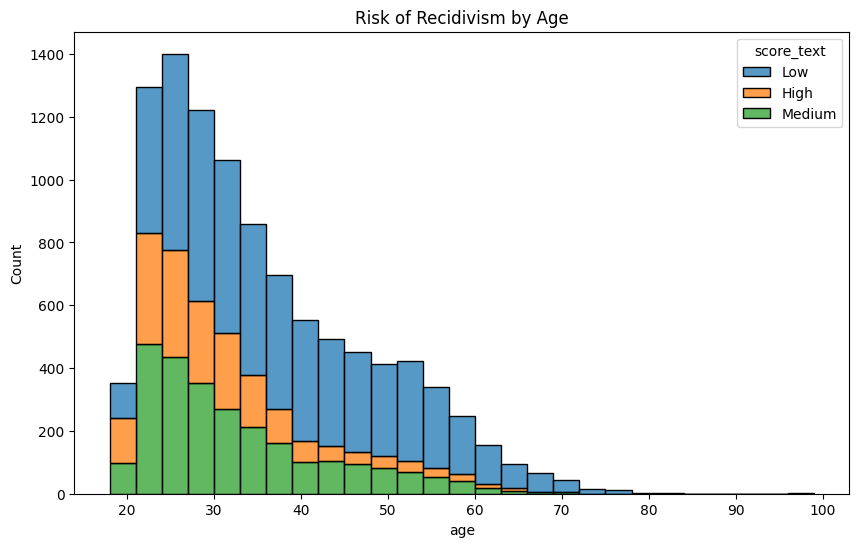

In [17]:
#Visualize the age distribution with 'score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='score_text', bins = bins_3_year, multiple='stack')
utils.plt.title('Risk of Recidivism by Age')

In [18]:
#Count the values of each 'score_text' for each 'age' bin
age_score_table = df_non_dup.groupby([age_bins, 'score_text'], observed=True)['name'].count().reset_index()
age_score_table.columns = ['age', 'score_text', 'count_score']
age_score_table['proportion'] = (age_score_table.groupby(['age'],  observed= True)['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_score_table

,age,score_text,count_score,proportion
0,"(18, 21]",High,276,35.430039
1,"(18, 21]",Low,244,31.322208
2,"(18, 21]",Medium,259,33.247754
3,"(21, 24]",High,322,24.101796
4,"(21, 24]",Low,540,40.419162
5,"(21, 24]",Medium,474,35.479042
6,"(24, 27]",High,331,24.020319
7,"(24, 27]",Low,634,46.008708
8,"(24, 27]",Medium,413,29.970972
9,"(27, 30]",High,263,22.575107


In [19]:
#For each bin and 'score_text' count the number of people who rescidivated and who did not
age_score_resid_table = df_non_dup.groupby([age_bins, 'score_text', 'is_recid'], observed=True)['name'].count().reset_index()
age_score_resid_table.columns = ['age', 'score_text', 'is_recid', 'count_score']
age_score_resid_table['proportion'] = (age_score_resid_table.groupby(['age', 'score_text'], observed= True)['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_score_resid_table

,age,score_text,is_recid,count_score,proportion
0,"(18, 21]",High,0,113,40.942029
1,"(18, 21]",High,1,163,59.057971
2,"(18, 21]",Low,0,165,67.622951
3,"(18, 21]",Low,1,79,32.377049
4,"(18, 21]",Medium,0,139,53.667954
...,...,...,...,...,...
105,"(75, 78]",Low,0,7,87.500000
106,"(75, 78]",Low,1,1,12.500000
107,"(78, 81]",Low,0,2,100.000000
108,"(81, 84]",Low,0,2,100.000000


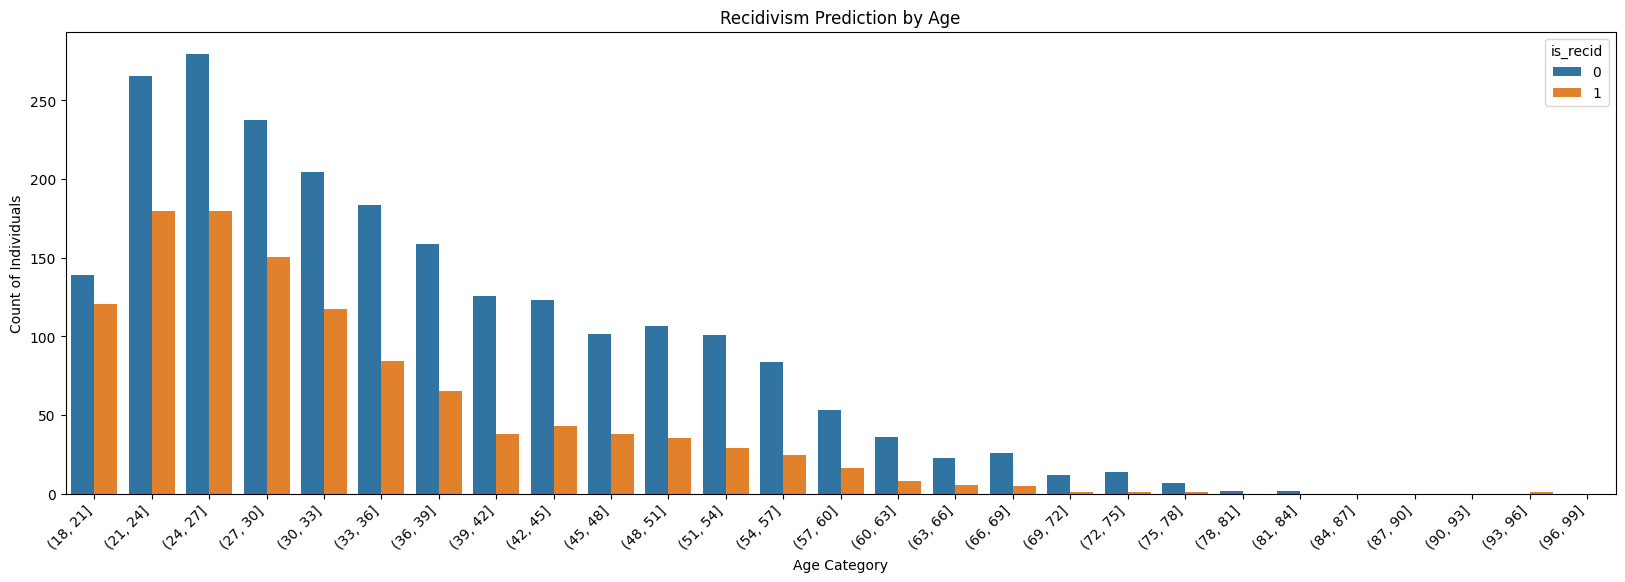

In [71]:
#Visualize the age bins with is_recid as hue
utils.plt.figure(figsize=(20, 6))
utils.sns.barplot(x='age', y='count_score', hue='is_recid', data=age_score_resid_table, errorbar=None)
utils.plt.title('Recidivism Prediction by Age')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("Count of Individuals")
utils.plt.legend(title="is_recid")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()


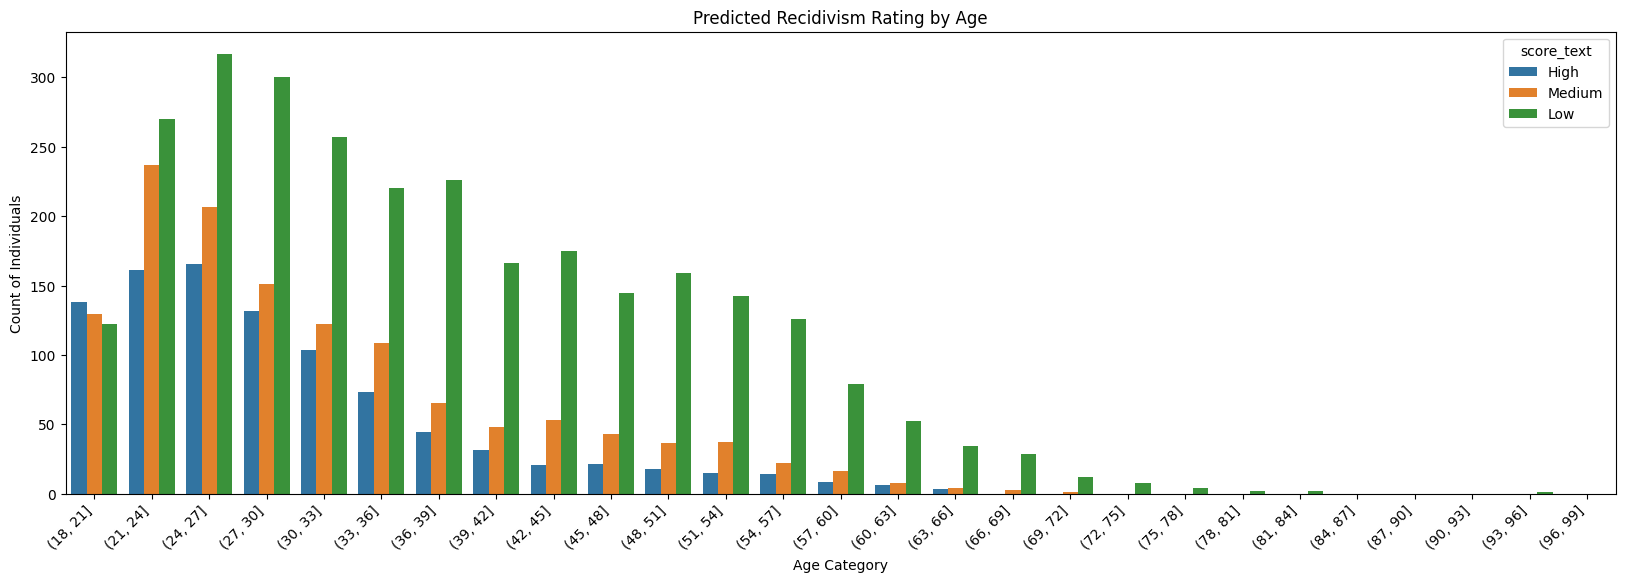

In [72]:
#Visualize the age bins with score_text as hue
utils.plt.figure(figsize=(20, 6))
utils.sns.barplot(x='age', y='count_score', hue='score_text', hue_order = ['High','Medium','Low'],data=age_score_resid_table, errorbar=None)
utils.plt.title('Predicted Recidivism Rating by Age')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("Count of Individuals")
utils.plt.legend(title="score_text")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()


## Age Distribution by Violent Recidivism

Text(0.5, 1.0, 'Risk of Violence by Age')

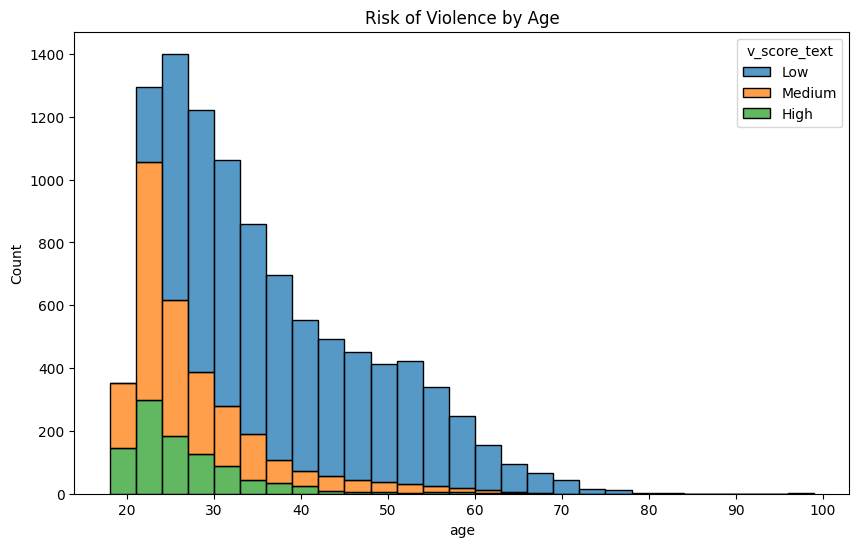

In [21]:
#Visualize the age distribution with 'v_score_text' as hue
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='v_score_text', bins = bins_3_year, multiple='stack')
utils.plt.title('Risk of Violence by Age')

In [22]:
#Count the values of each 'v_score_text' for each 'age' bin and display the proportion
age_v_score_table = df_non_dup.groupby([age_bins, 'v_score_text'], observed=True)['name'].count().reset_index()
age_v_score_table.columns = ['age', 'v_score_text', 'count_v_score']
age_v_score_table['proportion'] = (age_v_score_table.groupby(['age'], observed= True)['count_v_score'].apply((lambda x: x / x.sum()* 100)).values)
age_v_score_table

,age,v_score_text,count_v_score,proportion
0,"(18, 21]",High,272,34.916560
1,"(18, 21]",Low,14,1.797176
2,"(18, 21]",Medium,493,63.286264
3,"(21, 24]",High,225,16.841317
4,"(21, 24]",Low,474,35.479042
5,"(21, 24]",Medium,637,47.679641
6,"(24, 27]",High,177,12.844702
7,"(24, 27]",Low,835,60.595065
8,"(24, 27]",Medium,366,26.560232
9,"(27, 30]",High,107,9.184549


In [23]:
#For each bin and 'v_score_text' count the number of people who rescidivated (violent) and who did not
age_vscore_resid_table = df_non_dup.groupby([age_bins, 'v_score_text', 'is_violent_recid'], observed=True)['name'].count().reset_index()
age_vscore_resid_table.columns = ['age', 'v_score_text', 'is_violent_recid', 'count_score']
age_vscore_resid_table['proportion'] = (age_vscore_resid_table.groupby(['age', 'v_score_text'],  observed= True)['count_score'].apply((lambda x: x / x.sum()* 100)).values)
age_vscore_resid_table

,age,v_score_text,is_violent_recid,count_score,proportion
0,"(18, 21]",High,0,226,83.088235
1,"(18, 21]",High,1,46,16.911765
2,"(18, 21]",Low,0,14,100.000000
3,"(18, 21]",Medium,0,445,90.263692
4,"(18, 21]",Medium,1,48,9.736308
...,...,...,...,...,...
91,"(72, 75]",Low,0,15,100.000000
92,"(75, 78]",Low,0,8,100.000000
93,"(78, 81]",Low,0,2,100.000000
94,"(81, 84]",Low,0,2,100.000000


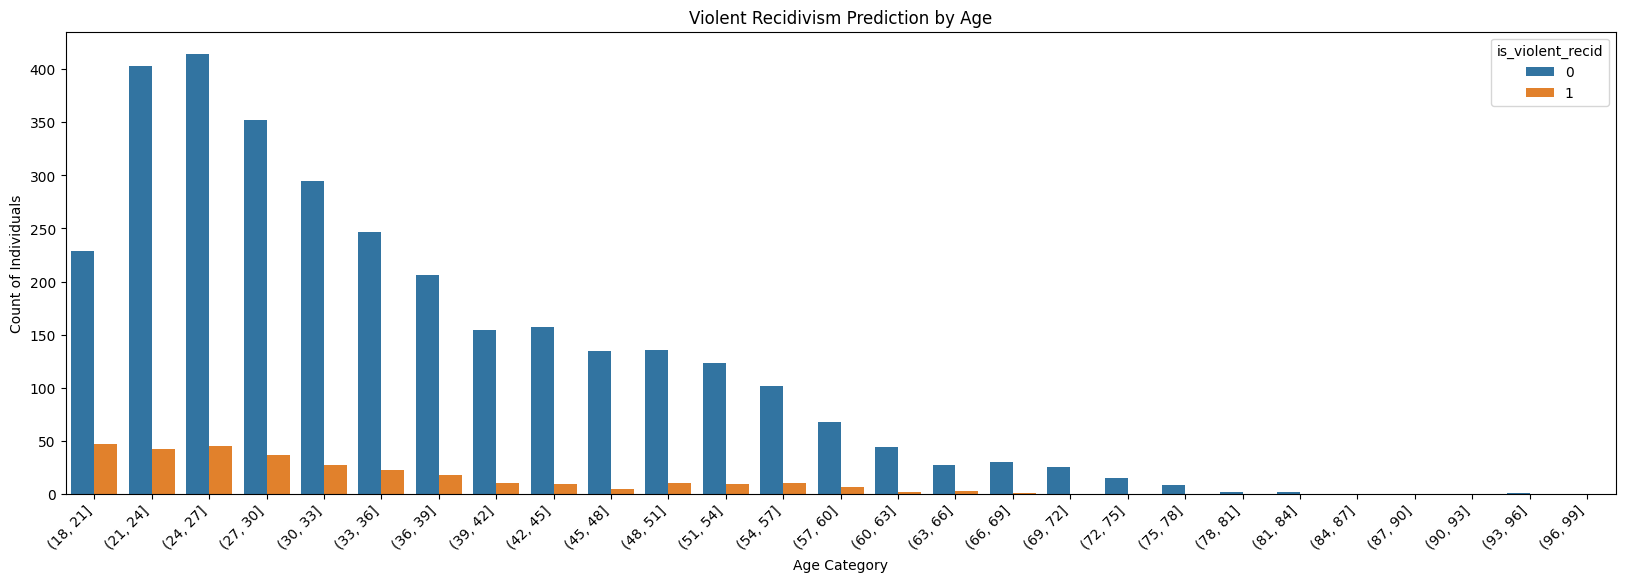

In [74]:
#Visualize the age bins with is_violent_recid as hue
utils.plt.figure(figsize=(20, 6))
utils.sns.barplot(x='age', y='count_score', hue='is_violent_recid', data=age_vscore_resid_table, errorbar=None)
utils.plt.title('Violent Recidivism Prediction by Age')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("Count of Individuals")
utils.plt.legend(title="is_violent_recid")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()


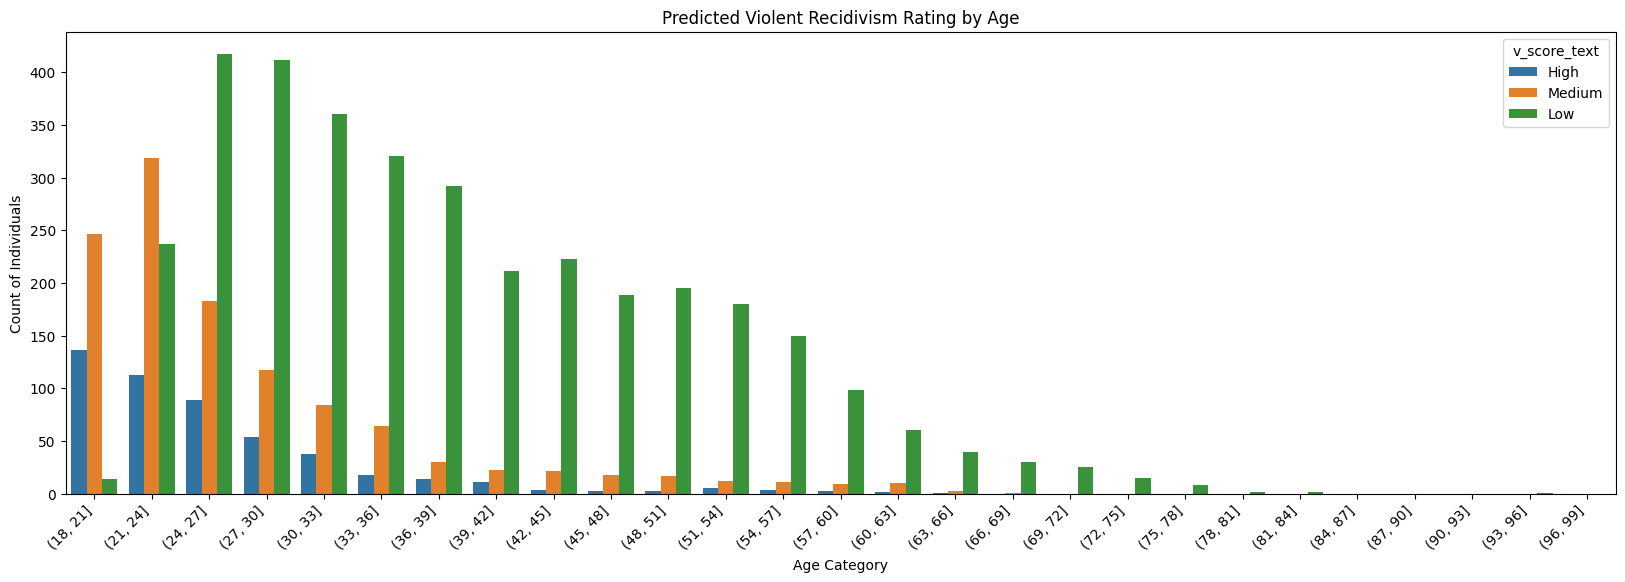

In [75]:
#Visualize the age bins with v_score_text as hue
utils.plt.figure(figsize=(20, 6))
utils.sns.barplot(x='age', y='count_score', hue='v_score_text', hue_order = ['High','Medium','Low'],data=age_vscore_resid_table, errorbar=None)
utils.plt.title('Predicted Violent Recidivism Rating by Age')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("Count of Individuals")
utils.plt.legend(title="v_score_text")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()

## Age Distribution by Race

Text(0.5, 1.0, 'Race by Age')

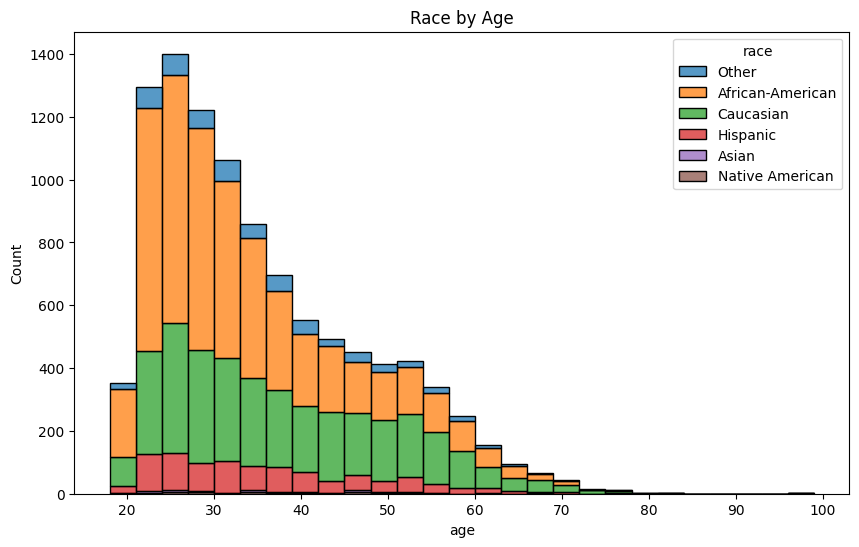

In [24]:
#Visualize the age distribution with 'race'
utils.plt.figure(figsize=(10, 6))
utils.sns.histplot(df_non_dup, x='age', hue='race', bins = bins_3_year, multiple='stack')
utils.plt.title('Race by Age')

In [25]:
#Count the values of each 'race' for each 'age' bin
age_race_table = df_non_dup.groupby([age_bins, 'race'], observed=True)['name'].count().reset_index()
age_race_table.columns = ['age', 'race', 'count']
age_race_table['proportion'] = (age_race_table.groupby(['age'], observed= True)['count'].apply((lambda x: x / x.sum() *100)).values)
age_race_table

,age,race,count,proportion
0,"(18, 21]",African-American,470,60.333761
1,"(18, 21]",Asian,2,0.256739
2,"(18, 21]",Caucasian,202,25.930680
3,"(18, 21]",Hispanic,63,8.087291
4,"(18, 21]",Native American,2,0.256739
...,...,...,...,...
105,"(75, 78]",Caucasian,5,62.500000
106,"(78, 81]",Caucasian,2,100.000000
107,"(81, 84]",Caucasian,1,50.000000
108,"(81, 84]",Hispanic,1,50.000000


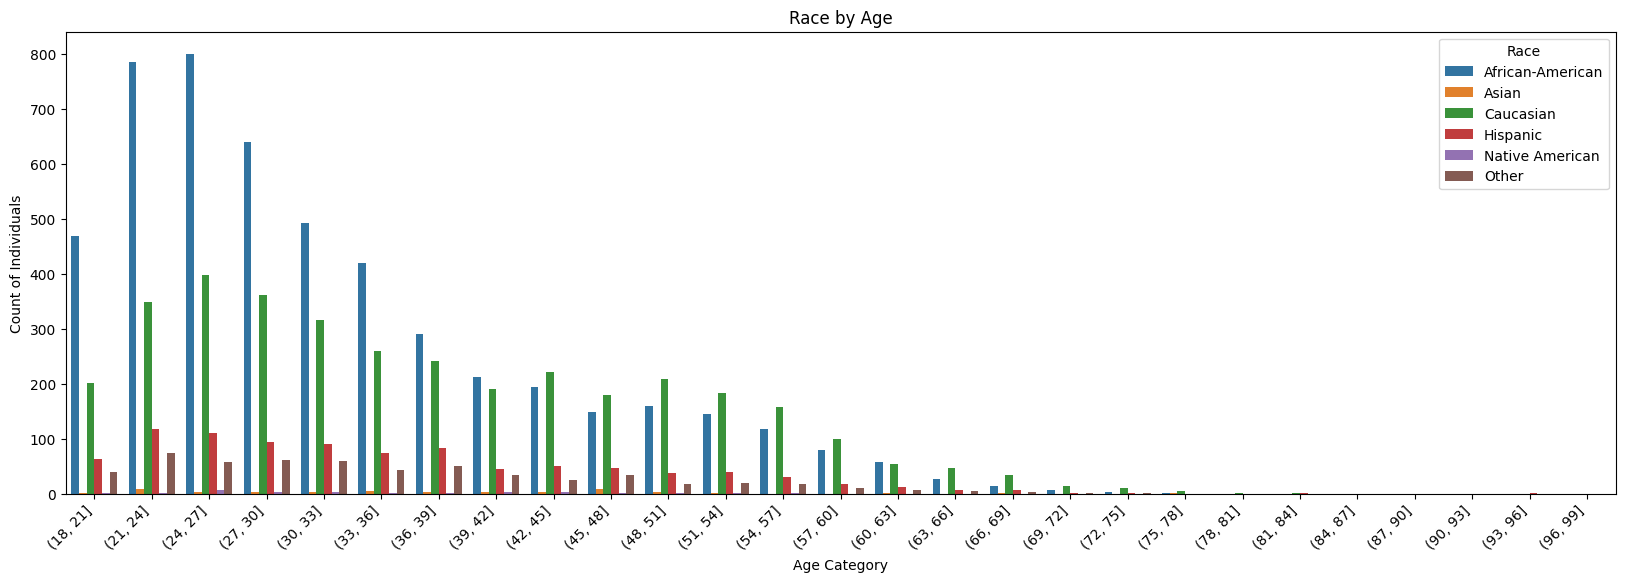

In [63]:
#Visualize Race and Age
utils.plt.figure(figsize=(20, 6))
utils.sns.barplot(x='age', y='count', hue='race',data=age_race_table, errorbar=None)
utils.plt.title('Race by Age')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("Count of Individuals")
utils.plt.legend(title="Race")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()

African American defendants were the most prevalent in the age bins below 42 years old.

## Age Distribution by Race and Recidivism

In [26]:
#For each bin and 'race' count the number of people who rescidivated and who did not and the proportion of each bin
age_race_resid_table = df_non_dup.groupby([age_bins, 'race', 'is_recid'], observed=True)['name'].count().reset_index()
age_race_resid_table.columns = ['age', 'race', 'is_recid', 'count_score']
age_race_resid_table['proportion'] = (age_race_resid_table.groupby(['age', 'race'], observed= True)['count_score'].apply((lambda x: x / x.sum() * 100)).values)
age_race_resid_table

,age,race,is_recid,count_score,proportion
0,"(18, 21]",African-American,0,244,51.914894
1,"(18, 21]",African-American,1,226,48.085106
2,"(18, 21]",Asian,1,2,100.000000
3,"(18, 21]",Caucasian,0,122,60.396040
4,"(18, 21]",Caucasian,1,80,39.603960
...,...,...,...,...,...
188,"(75, 78]",Caucasian,1,1,20.000000
189,"(78, 81]",Caucasian,0,2,100.000000
190,"(81, 84]",Caucasian,0,1,100.000000
191,"(81, 84]",Hispanic,0,1,100.000000


## Age Distribution by Race and Violent Recidivism

In [27]:
#For each bin and 'race' count the number of people who rescidivated (violent) and who did not and the proportion of each bin
age_race_vresid_table = df_non_dup.groupby([age_bins, 'race', 'is_violent_recid'], observed=True)['name'].count().reset_index()
age_race_vresid_table.columns = ['age', 'race', 'is_violent_recid', 'count_score']
age_race_vresid_table['proportion'] = (age_race_vresid_table.groupby(['age', 'race'], observed= True)['count_score'].apply((lambda x: x / x.sum() * 100)).values)
age_race_vresid_table

,age,race,is_violent_recid,count_score,proportion
0,"(18, 21]",African-American,0,415,88.297872
1,"(18, 21]",African-American,1,55,11.702128
2,"(18, 21]",Asian,1,2,100.000000
3,"(18, 21]",Caucasian,0,178,88.118812
4,"(18, 21]",Caucasian,1,24,11.881188
...,...,...,...,...,...
165,"(75, 78]",Caucasian,0,5,100.000000
166,"(78, 81]",Caucasian,0,2,100.000000
167,"(81, 84]",Caucasian,0,1,100.000000
168,"(81, 84]",Hispanic,0,1,100.000000


# False Positive Rate by Age

The False Positive Rate is the proportion of individuals that were predicted to reoffend, but did not. This is calculated as the number of false positives divided by the number of individuals predicted to reoffend. For this analysis, we will be examining False Positives for individuals who were rated as 'High' risk of reoffending.

## False Positive Rate for Recidivism

In [28]:
#Count the number of False Positives for recidivism
fp_resid = df_non_dup[(df_non_dup['resid_outcome'] == 'False Positive') | (df_non_dup['resid_outcome'] == 'Negative')]
tn_fp_count_resid = len(fp_resid)
print(f"Count of False Positives: {tn_fp_count_resid}")

Count of False Positives: 5692


In [29]:
#Calculate the false positive rate for each 'age' bin
age_fp_table = fp_resid.groupby(age_bins, observed=True).size().reset_index(name='count')
age_fp_table['fp_rate'] = (age_fp_table['count'] / tn_fp_count_resid) * 100
age_fp_table

,age,count,fp_rate
0,"(18, 21]",244,4.286718
1,"(21, 24]",540,9.486999
2,"(24, 27]",634,11.138440
3,"(27, 30]",600,10.541110
4,"(30, 33]",514,9.030218
5,"(33, 36]",441,7.747716
6,"(36, 39]",452,7.940970
7,"(39, 42]",332,5.832748
8,"(42, 45]",350,6.148981
9,"(45, 48]",289,5.077301


In [30]:
#Sort the table by 'count' then 'fp_rate'
age_fp_table.sort_values(['count', 'fp_rate'], ascending=False)

,age,count,fp_rate
2,"(24, 27]",634,11.138440
3,"(27, 30]",600,10.541110
1,"(21, 24]",540,9.486999
4,"(30, 33]",514,9.030218
6,"(36, 39]",452,7.940970
5,"(33, 36]",441,7.747716
8,"(42, 45]",350,6.148981
7,"(39, 42]",332,5.832748
10,"(48, 51]",318,5.586788
9,"(45, 48]",289,5.077301


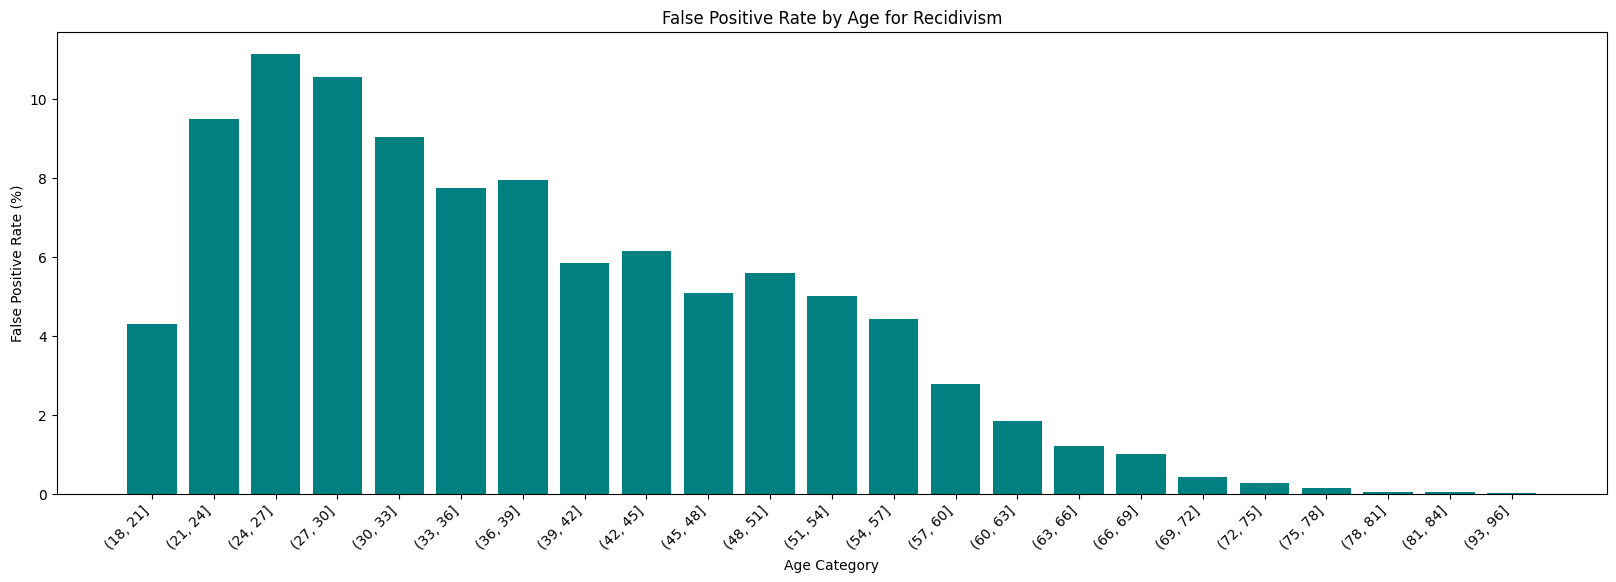

In [69]:
#Plot the false positive rate by age for recidivism
utils.plt.figure(figsize=(20, 6))
utils.plt.bar(age_fp_table['age'].astype(str), age_fp_table['fp_rate'], color='teal')
utils.plt.title('False Positive Rate by Age for Recidivism')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("False Positive Rate (%)")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()

## False Positive Rate for Violent Recidivism

In [31]:
#Count the number of False Positives for violent recidivism
fp_v_resid = df_non_dup[(df_non_dup['v_resid_outcome'] == 'False Positive') | (df_non_dup['v_resid_outcome'] == 'Negative')]
tn_fp_count_v_resid = len(fp_v_resid)
print(f"Count of False Positives: {tn_fp_count_v_resid}")

Count of False Positives: 6899


In [ ]:
#Calculate the false positive rate for each 'age' bin
age_fp_table_v = fp_v_resid.groupby([age_bins], observed=True).size().reset_index(name='count')
age_fp_table_v['fp_rate'] = (age_fp_table_v['count'] / tn_fp_count_v_resid) * 100
age_fp_table_v

,age,race,count,fp_rate
0,"(18, 21]",African-American,4,0.057979
1,"(18, 21]",Caucasian,7,0.101464
2,"(18, 21]",Hispanic,1,0.014495
3,"(18, 21]",Other,2,0.028990
4,"(21, 24]",African-American,229,3.319322
...,...,...,...,...
103,"(75, 78]",Caucasian,5,0.072474
104,"(78, 81]",Caucasian,2,0.028990
105,"(81, 84]",Caucasian,1,0.014495
106,"(81, 84]",Hispanic,1,0.014495


In [77]:
#Sort the table by 'count' then 'fp_rate'
age_fp_table_v.sort_values(['count', 'fp_rate'], ascending=False)

,age,race,count,fp_rate
10,"(24, 27]",African-American,406,5.884911
16,"(27, 30]",African-American,399,5.783447
22,"(30, 33]",African-American,318,4.609364
28,"(33, 36]",African-American,301,4.362951
12,"(24, 27]",Caucasian,294,4.261487
...,...,...,...,...
100,"(72, 75]",Other,1,0.014495
102,"(75, 78]",Asian,1,0.014495
105,"(81, 84]",Caucasian,1,0.014495
106,"(81, 84]",Hispanic,1,0.014495


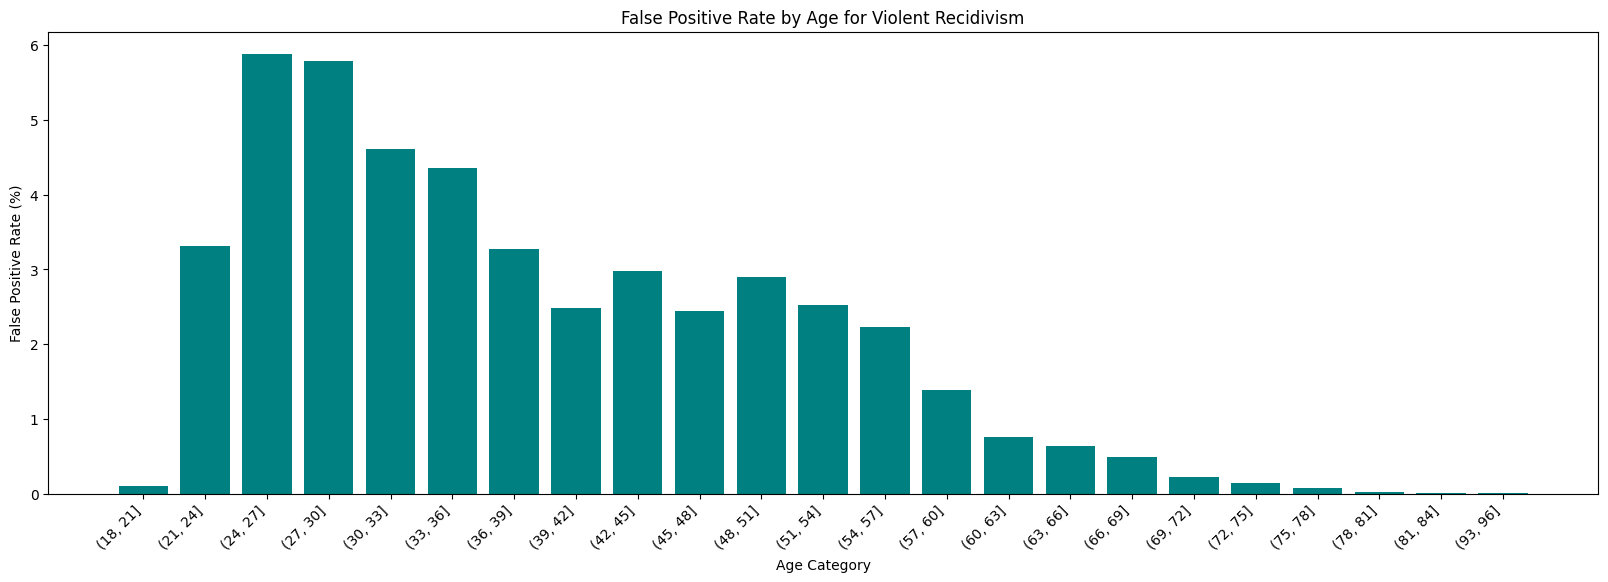

In [ ]:
#Plot the false positive rate by age for violent recidivism
utils.plt.figure(figsize=(20, 6))
utils.plt.bar(age_fp_table_v['age'].astype(str), age_fp_table_v['fp_rate'], color='teal')
utils.plt.title('False Positive Rate by Age for Violent Recidivism')
utils.plt.xlabel("Age Category")
utils.plt.ylabel("False Positive Rate (%)")
utils.plt.xticks(rotation=45, ha="right")
utils.plt.show()

# False Positive Rate by Age and Race

## False Positive Rate for Recidivism

In [34]:
#Calculate the false positive rate for each 'age' bin
age_race_fp_table = fp_resid.groupby([age_bins,'race'], observed=True).size().reset_index(name='count')
age_race_fp_table['fp_rate'] = (age_race_fp_table['count'] / tn_fp_count_resid) * 100
age_race_fp_table

,age,race,count,fp_rate
0,"(18, 21]",African-American,118,2.073085
1,"(18, 21]",Caucasian,80,1.405481
2,"(18, 21]",Hispanic,25,0.439213
3,"(18, 21]",Other,21,0.368939
4,"(21, 24]",African-American,273,4.796205
...,...,...,...,...
101,"(75, 78]",Caucasian,5,0.087843
102,"(78, 81]",Caucasian,2,0.035137
103,"(81, 84]",Caucasian,1,0.017569
104,"(81, 84]",Hispanic,1,0.017569


In [ ]:
age_race_fp_table.sort_values(['count', 'fp_rate'], ascending=False)

,age,race,count,fp_rate
10,"(24, 27]",African-American,301,5.288124
16,"(27, 30]",African-American,276,4.848911
4,"(21, 24]",African-American,273,4.796205
12,"(24, 27]",Caucasian,213,3.742094
18,"(27, 30]",Caucasian,211,3.706957
...,...,...,...,...
98,"(72, 75]",Other,1,0.017569
100,"(75, 78]",Asian,1,0.017569
103,"(81, 84]",Caucasian,1,0.017569
104,"(81, 84]",Hispanic,1,0.017569


## False Positive Rate for Violent Recidivism

In [35]:
#Calculate the false positive rate for each 'age' and 'race' bin
age_race_fp_table_v = fp_v_resid.groupby([age_bins,'race'], observed=True).size().reset_index(name='count')
age_race_fp_table_v['fp_rate'] = (age_race_fp_table_v['count'] / tn_fp_count_v_resid) * 100
age_race_fp_table_v

,age,race,count,fp_rate
0,"(18, 21]",African-American,4,0.057979
1,"(18, 21]",Caucasian,7,0.101464
2,"(18, 21]",Hispanic,1,0.014495
3,"(18, 21]",Other,2,0.028990
4,"(21, 24]",African-American,229,3.319322
...,...,...,...,...
103,"(75, 78]",Caucasian,5,0.072474
104,"(78, 81]",Caucasian,2,0.028990
105,"(81, 84]",Caucasian,1,0.014495
106,"(81, 84]",Hispanic,1,0.014495


In [65]:
age_race_fp_table_v.sort_values(['count', 'fp_rate'], ascending=False)

,age,race,count,fp_rate
10,"(24, 27]",African-American,406,5.884911
16,"(27, 30]",African-American,399,5.783447
22,"(30, 33]",African-American,318,4.609364
28,"(33, 36]",African-American,301,4.362951
12,"(24, 27]",Caucasian,294,4.261487
...,...,...,...,...
100,"(72, 75]",Other,1,0.014495
102,"(75, 78]",Asian,1,0.014495
105,"(81, 84]",Caucasian,1,0.014495
106,"(81, 84]",Hispanic,1,0.014495
